<a href="https://colab.research.google.com/github/PaulToronto/AI-and-Machine-Learning-for-Coders---Book/blob/main/3_3_Extra_Model_to_Output_Feature_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra - Model to Output Feature Maps

## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## The Model We Built in Chapter 3

In [2]:
data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

train_images = train_images.reshape(60_000, 28, 28, 1)
test_images = test_images.reshape(10_000, 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4328 - accuracy: 0.8426
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2887 - accuracy: 0.8942
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2452 - accuracy: 0.9089
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2112 - accuracy: 0.9205
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1866 - accuracy: 0.9303
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1620 - accuracy: 0.9391
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1406 - accuracy: 0.9474
Epoch 8/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1257 - accuracy: 0.9526
Epoch 9/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1093 - accuracy: 0.9587
Epoch 10/50
1875/1875 [==============================] - 15s 8ms/step - l

In [6]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9607 - accuracy: 0.9085


[0.9607040882110596, 0.9085000157356262]

### Using the original model to build a simple model that makes the same predictions as the original model

In [7]:
simple_model = tf.keras.models.Model(inputs=model.inputs,
                                     outputs = model.outputs)

simple_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0     

In [8]:
(simple_model.predict(train_images) == model.predict(train_images)).sum(), test_labels.shape

1875/1875 [==============================] - 6s 3ms/step


(600000, (10000,))

## Create a New Models to Output Feature Maps

In [9]:
layer_name = 'conv2d'

feature_map_model_conv2d = tf.keras.models.Model(inputs=simple_model.input,
                                                 outputs=simple_model.get_layer(layer_name).output)
feature_map_model_conv2d.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
Total params: 640 (2.50 KB)
Trainable params: 640 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
layer_name = 'max_pooling2d'

feature_map_model_max_pooling2d = tf.keras.models.Model(inputs=simple_model.input,
                                                        outputs=simple_model.get_layer(layer_name).output)

In [11]:
layer_name = 'conv2d_1'

feature_map_model_conv2d_1 = tf.keras.models.Model(inputs=simple_model.input,
                                                   outputs=simple_model.get_layer(layer_name).output)

In [12]:
layer_name = 'max_pooling2d_1'

feature_map_model_max_pooling2d_1 = tf.keras.models.Model(inputs=simple_model.input,
                                                          outputs=simple_model.get_layer(layer_name).output)

### Prepare an Input Image

In [13]:
input_image = test_images[0]
input_image = input_image.reshape(1, 28, 28, 1)
input_image.dtype

dtype('float64')

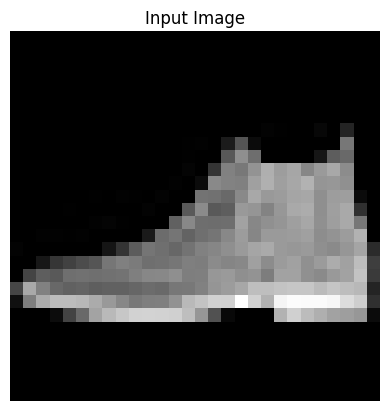

In [14]:
# Display the image
plt.imshow(input_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('Input Image')
plt.show()

### Generate Feature Maps for that image

In [15]:
feature_maps_conv2d = feature_map_model_conv2d.predict(input_image)
feature_maps_max_pooling2d = feature_map_model_max_pooling2d(input_image)
feature_maps_conv2d_1 = feature_map_model_conv2d_1(input_image)
feature_maps_max_pooling2d_1 = feature_map_model_max_pooling2d_1(input_image)

(feature_maps_conv2d.shape,
 feature_maps_max_pooling2d.shape,
 feature_maps_conv2d_1.shape,
 feature_maps_max_pooling2d_1.shape)

1/1 [==============================] - 0s 46ms/step


((1, 26, 26, 64),
 TensorShape([1, 13, 13, 64]),
 TensorShape([1, 11, 11, 64]),
 TensorShape([1, 5, 5, 64]))

### Visualize the Feature Maps

#### `conv2d`

In [16]:
num_feature_maps = feature_maps_conv2d.shape[-1]
num_feature_maps

64

In [17]:
feature_maps_conv2d[0, :, :, 0].shape

(26, 26)

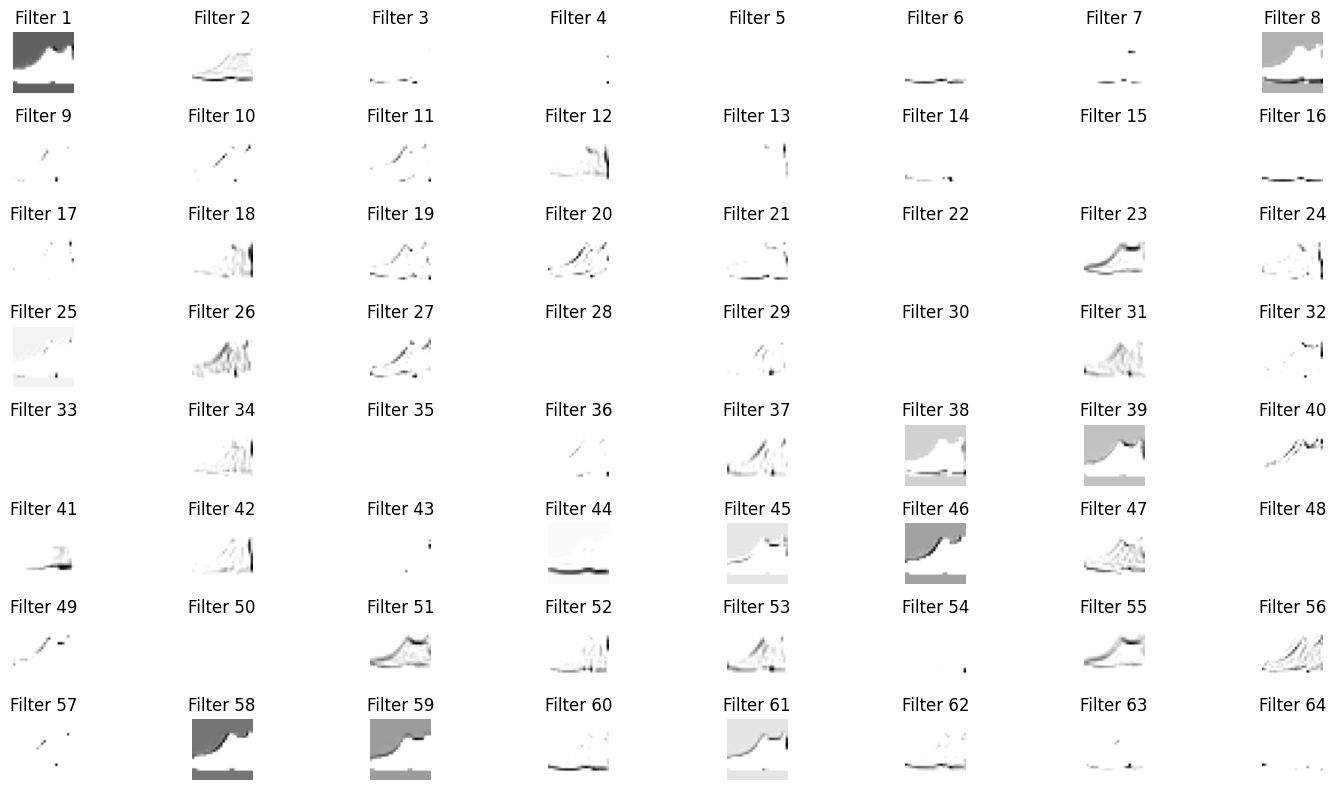

In [18]:
# plot all the feature maps
fig, axes = plt.subplots(8, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_conv2d[0, :, :, i], cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'Filter {i+1}')

plt.tight_layout()
plt.show()

#### `max_pooling2d`

In [19]:
num_feature_maps = feature_maps_max_pooling2d.shape[-1]
num_feature_maps

64

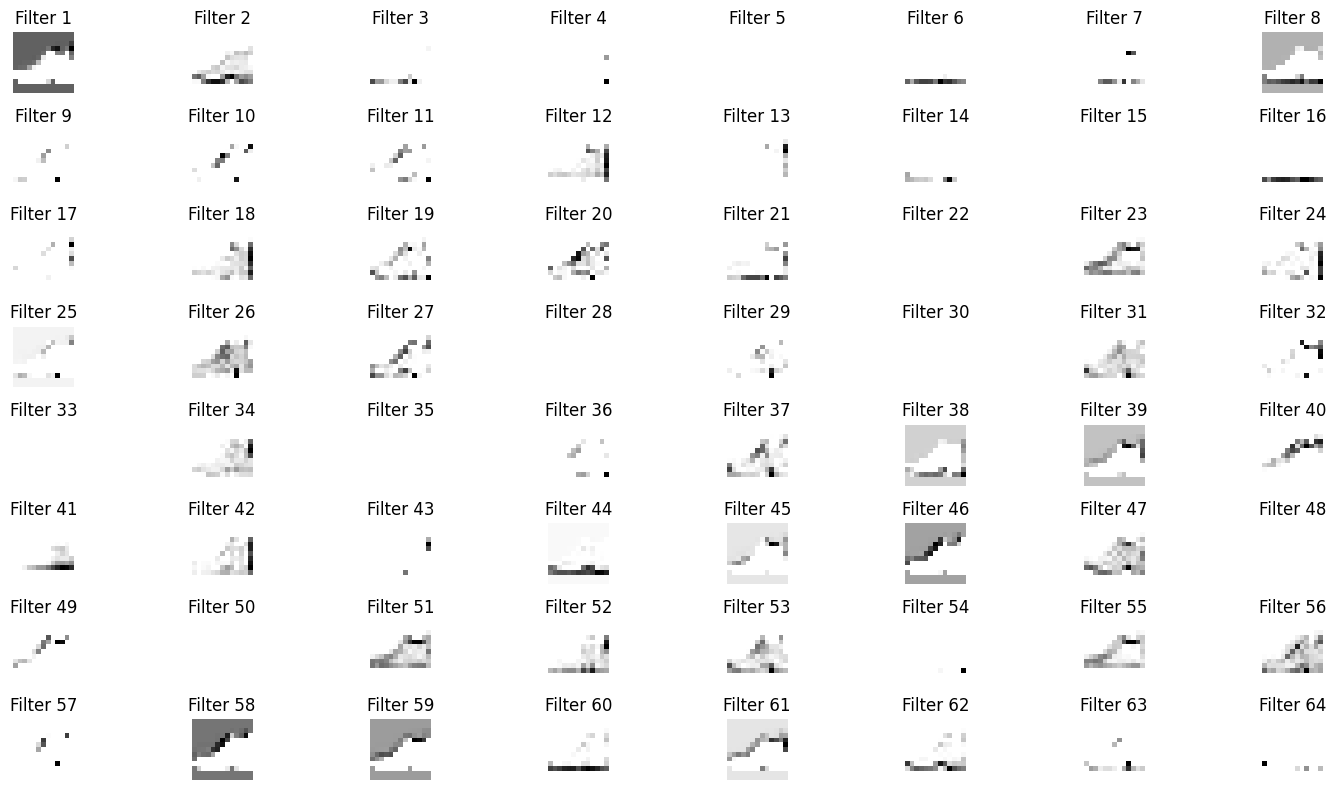

In [20]:
# plot all the feature maps
fig, axes = plt.subplots(8, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_max_pooling2d[0, :, :, i], cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'Filter {i+1}')

plt.tight_layout()
plt.show()

#### `conv2d_`

In [21]:
num_feature_maps = feature_maps_conv2d_1.shape[-1]
num_feature_maps

64

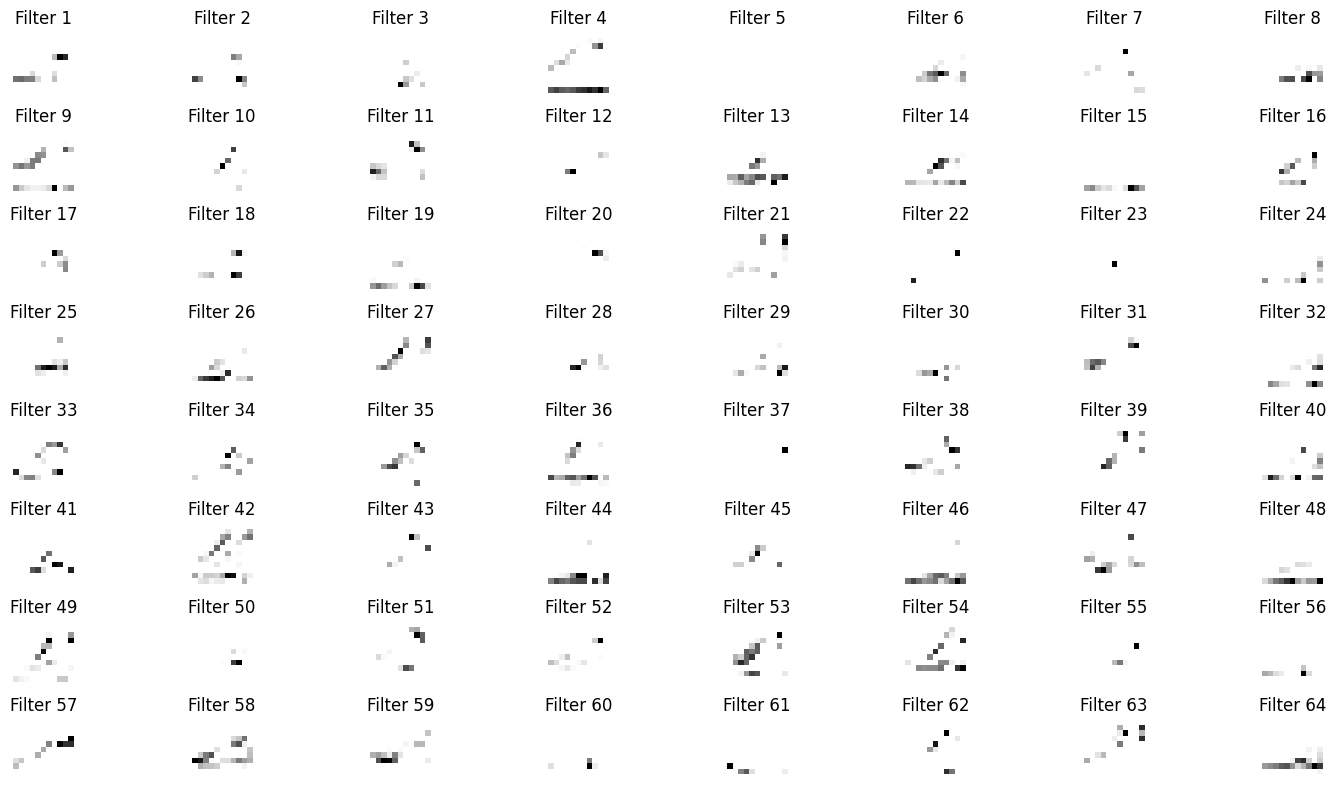

In [22]:
# plot all the feature maps
fig, axes = plt.subplots(8, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_conv2d_1[0, :, :, i], cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'Filter {i+1}')

plt.tight_layout()
plt.show()

#### `max_pooling2d_1`

In [23]:
num_feature_maps = feature_maps_max_pooling2d_1.shape[-1]
num_feature_maps

64

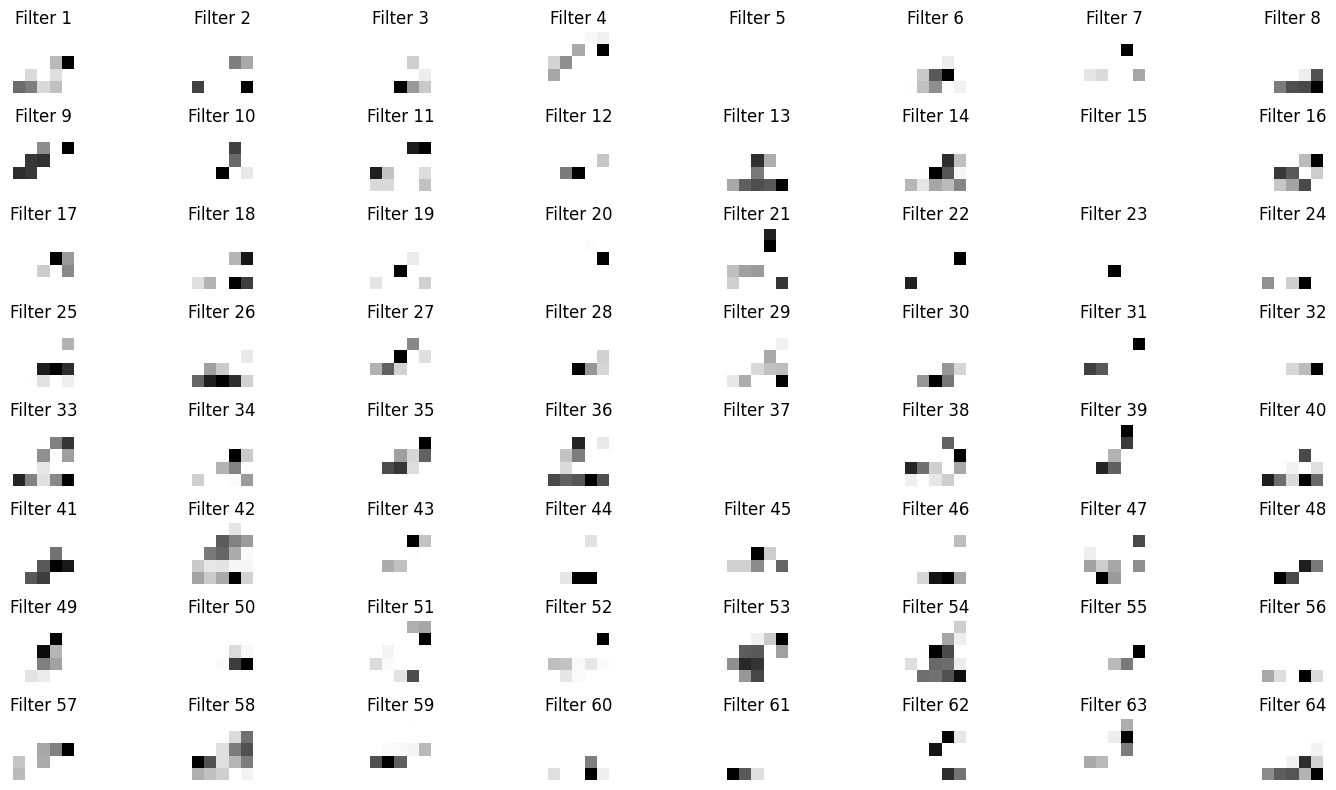

In [24]:
# plot all the feature maps
fig, axes = plt.subplots(8, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_max_pooling2d_1[0, :, :, i], cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'Filter {i+1}')

plt.tight_layout()
plt.show()

## MNIST CNN

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
# Define a simple CNN model
input_layer = Input(shape=(28, 28, 1))  # Example input shape (28x28 grayscale image)
conv_layer = Conv2D(32, (3, 3), activation='relu')(input_layer)
pooling_layer = MaxPooling2D((2, 2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer = Dense(10, activation='softmax')(flatten_layer)

# Create the model
model = Model(inputs=input_layer, outputs=dense_layer)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.9345 - accuracy: 0.9350 - val_loss: 0.1569 - val_accuracy: 0.9638
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0949 - accuracy: 0.9750 - val_loss: 0.1132 - val_accuracy: 0.9705
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0581 - accuracy: 0.9828 - val_loss: 0.1028 - val_accuracy: 0.9767
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0976 - val_accuracy: 0.9757
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1483 - val_accuracy: 0.9695
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.1255 - val_accuracy: 0.9750
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.1306 - val_accuracy: 0.9729
Epoch 

### Create New Models to Output Feature Maps

In [29]:
conv2d_layer = model.layers[1].output

conv2d_model = Model(inputs=model.input,
                     outputs=conv2d_layer)
conv2d_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
max_pooling2d_layer = model.layers[2].output

max_pooling_2d_model = Model(inputs=model.input,
                             outputs=max_pooling2d_layer)

max_pooling_2d_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Prepare an Input Image

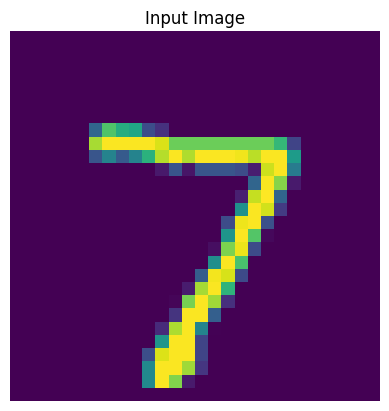

In [31]:
input_image = x_test[0]
input_image = input_image.reshape(1, 28, 28, 1)
input_image.astype('float32') / 255.0

# display image
plt.imshow(input_image[0, :, :, 0], cmap='viridis')
plt.title('Input Image')
plt.axis('off')
plt.show()

### Generate Feature Maps

In [32]:
feature_maps_conv2d = conv2d_model.predict(input_image)
num_feature_maps = feature_maps_conv2d.shape[-1]
num_feature_maps # same number for pooling layer

1/1 [==============================] - 0s 50ms/step


32

In [33]:
feature_maps_pooling = max_pooling_2d_model.predict(input_image)

1/1 [==============================] - 0s 44ms/step


### Visualize the Feature Maps

#### Convolutional layer

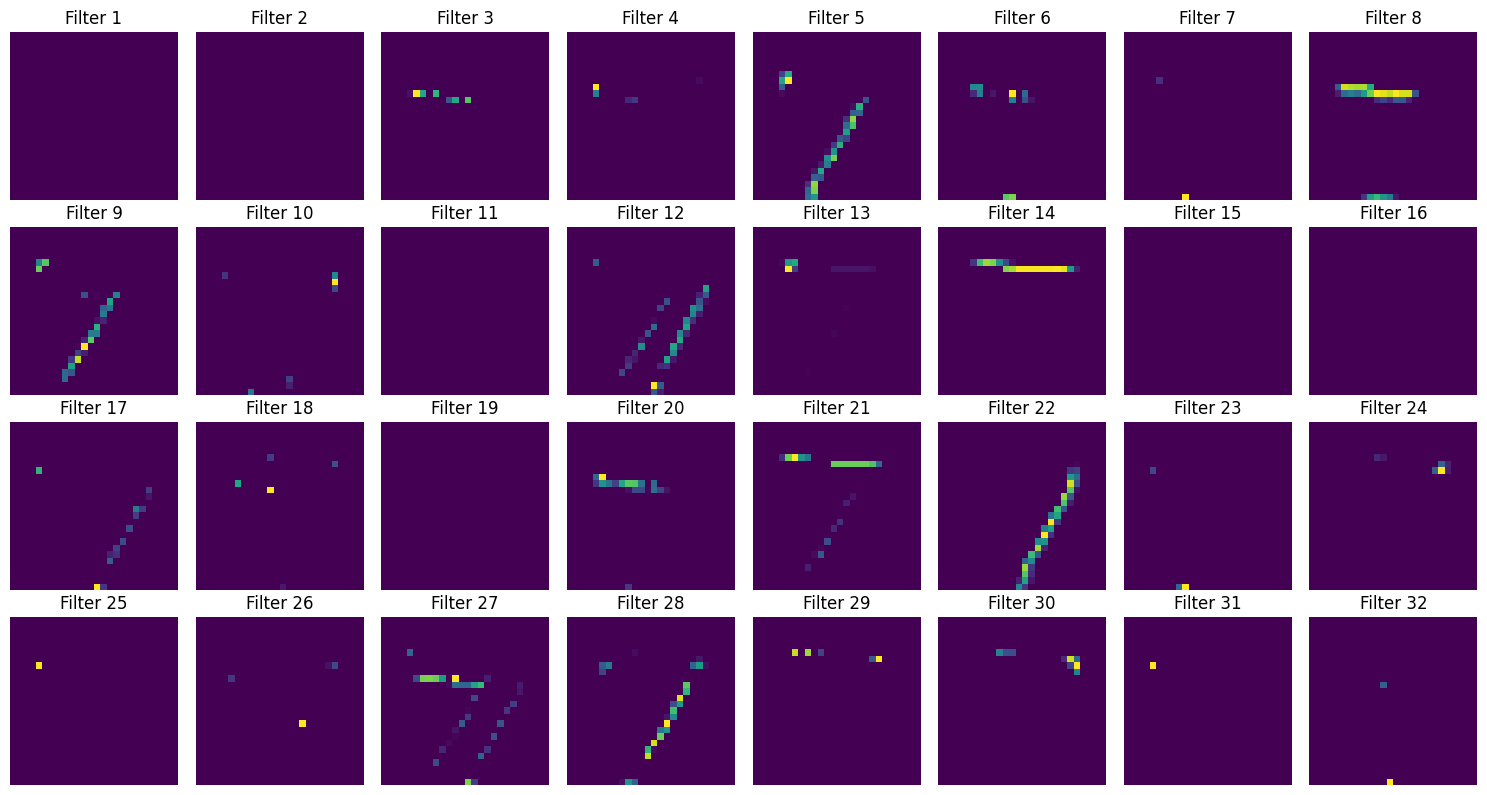

In [34]:
# Plot all the feature maps
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # Plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_conv2d[0, :, :, i], cmap='viridis')
    ax.axis('off')
    ax.set_title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

#### Pooling layer

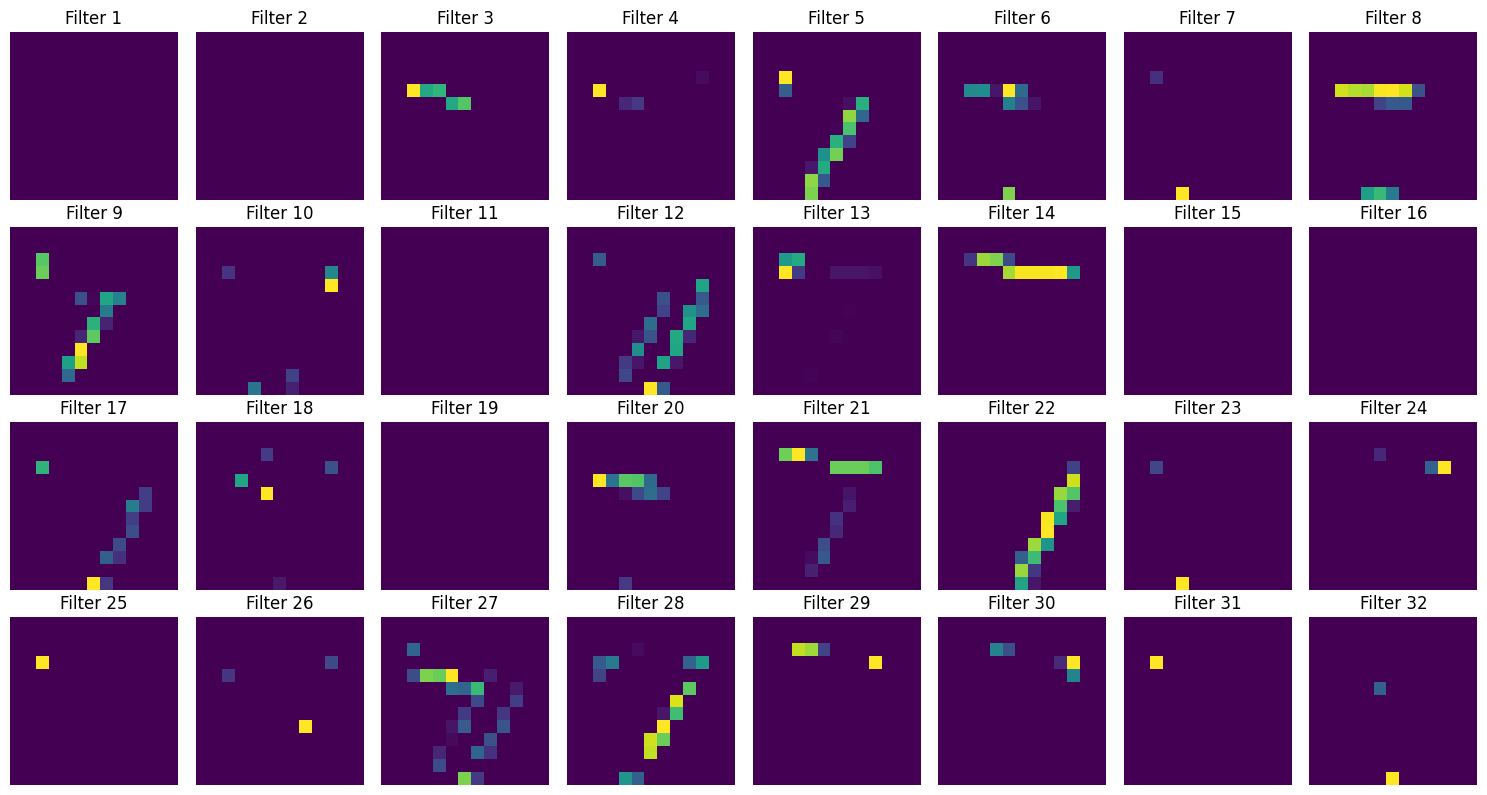

In [35]:
# Plot all the feature maps
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # Plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_pooling[0, :, :, i], cmap='viridis')
    ax.axis('off')
    ax.set_title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

## RGB Example

### Data

In [36]:
# Example: Load a sample image from CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape

(50000, 32, 32, 3)

In [37]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Build a simple model for RGB input

In [38]:
# Define a simple CNN model for RGB input (32x32 RGB image)
input_layer = Input(shape=(32, 32, 3))  # Example input shape (32x32 RGB image)
conv_layer = Conv2D(32, (3, 3), activation='relu', name='conv2d')(input_layer)
pooling_layer = MaxPooling2D((2, 2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer = Dense(10, activation='softmax')(flatten_layer)

# Create the model
model = Model(inputs=input_layer, outputs=dense_layer)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                72010     
                                                                 
Total params: 72906 (284.79 KB)
Trainable params: 72906 (284.79 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

### Compile and Train

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 5s 6ms/step - loss: 1.5357 - accuracy: 0.4632 - val_loss: 1.3329 - val_accuracy: 0.5327
Epoch 2/5
782/782 [==============================] - 4s 6ms/step - loss: 1.2634 - accuracy: 0.5606 - val_loss: 1.3297 - val_accuracy: 0.5250
Epoch 3/5
782/782 [==============================] - 4s 6ms/step - loss: 1.1718 - accuracy: 0.5951 - val_loss: 1.1955 - val_accuracy: 0.5810
Epoch 4/5
782/782 [==============================] - 4s 6ms/step - loss: 1.1049 - accuracy: 0.6184 - val_loss: 1.1359 - val_accuracy: 0.6033
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 1.0484 - accuracy: 0.6397 - val_loss: 1.1581 - val_accuracy: 0.5966


### Feature Map Models

In [41]:
feature_map_conv_model = Model(inputs=model.input,
                               outputs=conv_layer)
feature_map_pooling_model = Model(inputs=model.input,
                                  outputs=pooling_layer)

### Test Image

In [42]:
input_image = x_test[0:1]
input_image.shape

(1, 32, 32, 3)

In [43]:
class_names = ['Airplane',
               'Automobile',
               'Bird',
               'Cat',
               'Deer',
               'Dog',
               'Frog',
               'Horse',
               'Ship',
               'Truck']

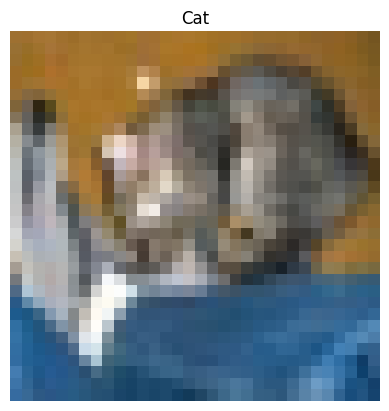

In [44]:
plt.imshow(input_image[0,:, :, :])
plt.title(class_names[y_test[0][0]])
plt.axis('off')
plt.show()

### Generate Feature Maps

In [45]:
input_image.shape

(1, 32, 32, 3)

In [46]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                72010     
                                                                 
Total params: 72906 (284.79 KB)
Trainable params: 72906 (284.79 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [47]:
feature_maps_conv = feature_map_conv_model.predict(input_image)
feature_maps_pooling = feature_map_pooling_model.predict(input_image)

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 44ms/step


### Visualize Feature Maps

When you pass an RGB image through a convolutional layer, the output feature maps do not have separate color channels like the original input image. Instead, the convolutional operation processes all input channels (color channels) together, and each filter (kernel) in the convolutional layer produces a single-channel output feature map.

Feature maps after a convolutional layer do not retain the original color channels separately. Instead, they produce new channels equal to the number of filters in the convolutional layer. Each new channel (feature map) represents a different learned feature from the input image, combining information across all original color channels.

In [48]:
feature_maps_conv.shape

(1, 30, 30, 32)

#### Convolutional layer

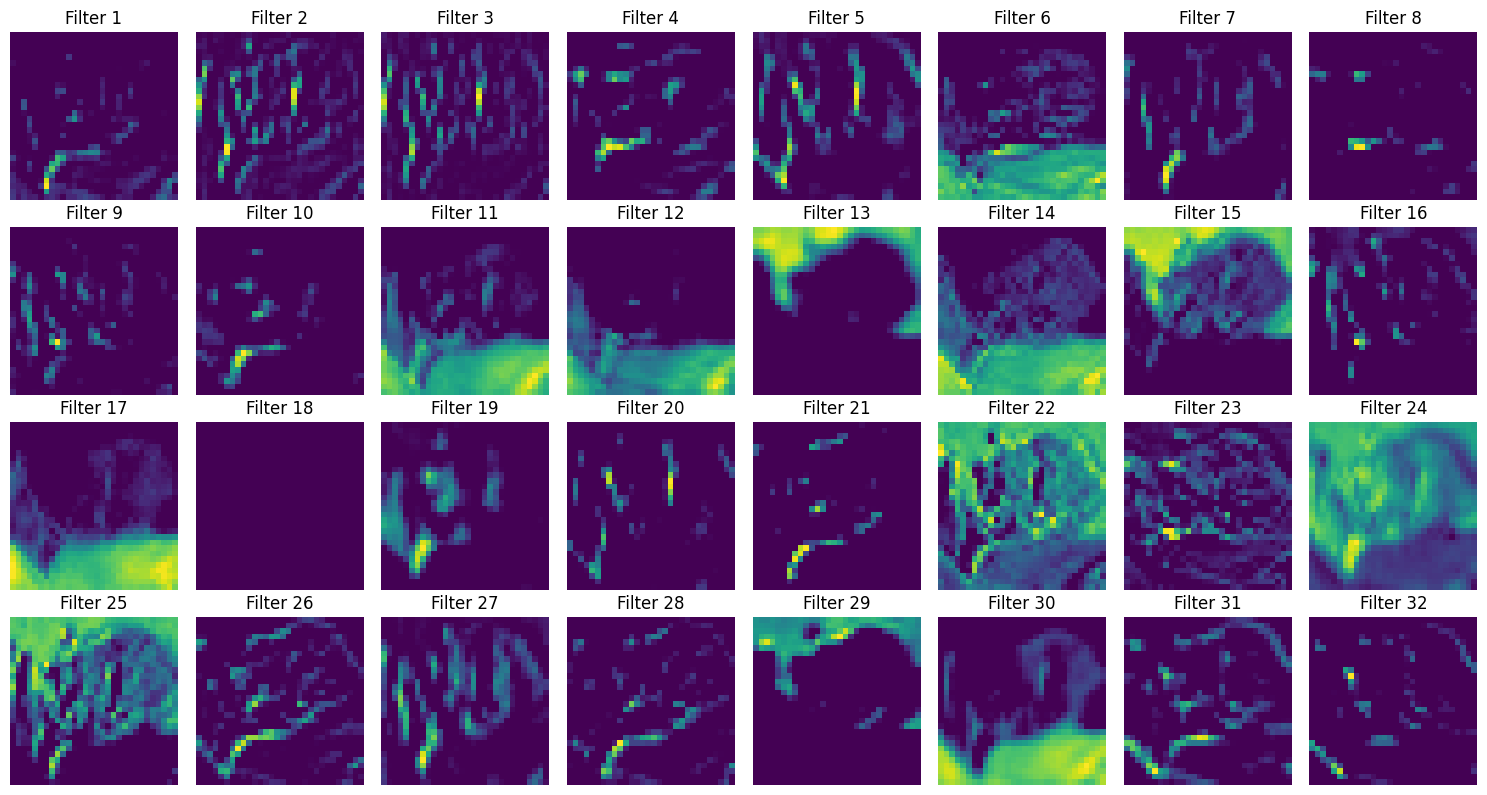

In [49]:
num_feature_maps = feature_maps_conv.shape[-1]

# Plot all the feature maps
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # Plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_conv[0, :, :, i])
    ax.axis('off')
    ax.set_title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

#### Pooling layer

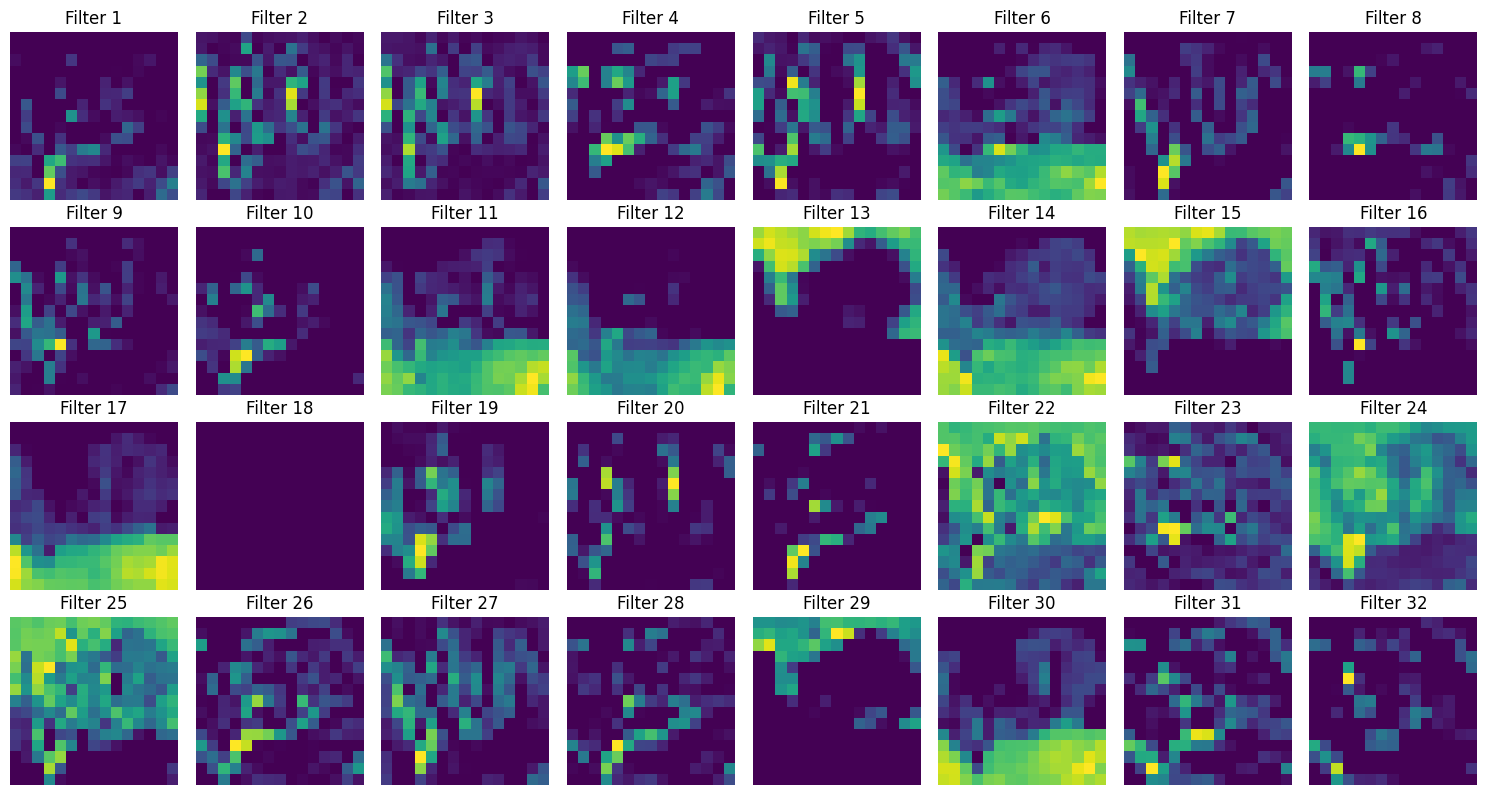

In [50]:
num_feature_maps = feature_maps_pooling.shape[-1]

# Plot all the feature maps
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_feature_maps):
    # Plot each feature map
    ax = axes[i]
    ax.imshow(feature_maps_pooling[0, :, :, i])
    ax.axis('off')
    ax.set_title(f"Filter {i+1}")

plt.tight_layout()
plt.show()